 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [29]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [30]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE

# Read in and create dataframe
whale_returns_df = pd.read_csv(whale_returns_csv, index_col ="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index 
whale_returns_df.sort_index(ascending= False, inplace=True)

# Display some statistics
whale_returns_df.head()
whale_returns_df.shape
whale_returns_df.describe()
whale_returns_df.count()
whale_returns_df.duplicated()
whale_returns_df.dtypes

whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-05-01                  -0.005847           -0.001341   
2019-04-30                  -0.001295           -0.002211   
2019-04-29                   0.001254            0.002719   
2019-04-26                   0.008149            0.009162   
2019-04-25                  -0.000285           -0.001291   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-05-01                    -0.007936               -0.007833  
2019-04-30                    -0.000259               -0.003702  
2019-04-29                     0.006251                0.005223  
2019-04-26                     0.012355                0.010434  
2019-04-25                    -0.005153                0.004848

In [31]:
# Count nulls
# YOUR CODE HERE

# Checking for null
whale_returns_df.isnull()

# Determining percentage of nulls
whale_returns_df.isnull().mean() * 100

# Determining number of nulls
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [32]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)

# Check if nulls are gone
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [33]:
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-05-01                  -0.005847           -0.001341   
2019-04-30                  -0.001295           -0.002211   
2019-04-29                   0.001254            0.002719   
2019-04-26                   0.008149            0.009162   
2019-04-25                  -0.000285           -0.001291   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-05-01                    -0.007936               -0.007833  
2019-04-30                    -0.000259               -0.003702  
2019-04-29                     0.006251                0.005223  
2019-04-26                     0.012355                0.010434  
2019-04-25                    -0.005153                0.004848

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [34]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE

# Read in and create dataframe
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index
algo_returns_df.sort_index(ascending=False, inplace=True)

# Display some statistics
algo_returns_df.head()
algo_returns_df.shape
algo_returns_df.describe()
algo_returns_df.count()
algo_returns_df.duplicated()

algo_returns_df.head()

Algo 1    Algo 2
Date                          
2019-05-01  0.000094 -0.007358
2019-04-30 -0.002944 -0.001570
2019-04-29  0.005208  0.002829
2019-04-26  0.002981  0.005256
2019-04-25  0.000682 -0.007247

In [35]:
# Count nulls
# YOUR CODE HERE

# Checking for null
algo_returns_df.isnull()

# Determining percentage of nulls
algo_returns_df.isnull().mean() * 100

# Determining number of nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)

# Check if nulls are gone
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [37]:
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2019-05-01  0.000094 -0.007358
2019-04-30 -0.002944 -0.001570
2019-04-29  0.005208  0.002829
2019-04-26  0.002981  0.005256
2019-04-25  0.000682 -0.007247

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [38]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE

# Read in and create dataframe
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index 
sp500_history_df.sort_index(ascending=False, inplace=True)

# Display some statistics
sp500_history_df.head()


Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [39]:
# Check Data Types

# Retrieving data types to confirm what needs to be converted
sp500_history_df.dtypes 


Close    object
dtype: object

In [40]:
# Fix Data Types
# YOUR CODE HERE

# make sure dollar sign disappearts through string replace 
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

# Confirming conversion worked
sp500_history_df.head()

Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06

In [41]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history_df.astype(float).pct_change()
daily_returns_sp500.sort_index()
daily_returns_sp500.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [42]:
# Drop nulls
# YOUR CODE HERE

# Checking for null
daily_returns_sp500.isnull()

# Determining percentage of nulls
daily_returns_sp500.isnull().mean() * 100

# Determining number of nulls
daily_returns_sp500.isnull().sum()

# Drop nulls 
daily_returns_sp500.dropna(inplace=True)

# Check if nulls are gone
daily_returns_sp500.isnull().sum()

daily_returns_sp500.head()

Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

In [43]:
# Rename Column
# YOUR CODE HERE

daily_returns_sp500 = daily_returns_sp500.rename(columns={'Close': 'S&P 500'})
daily_returns_sp500.head()

S&P 500
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [44]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_sp500], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

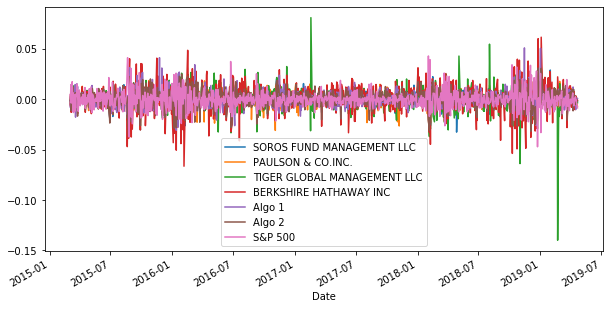

In [45]:
# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(10,5))

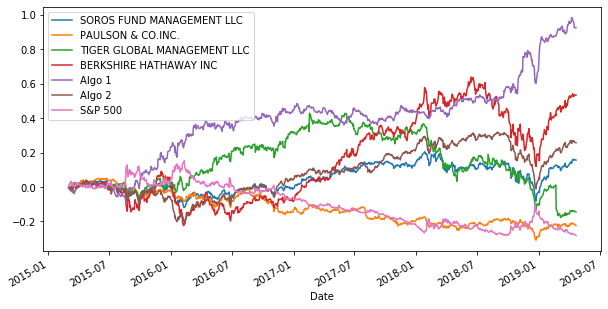

In [46]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns = (1+ combined_df).cumprod()-1
cumulative_returns.head()

# plot the cumulative returns
cumulative_returns.plot(figsize=(10,5))


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

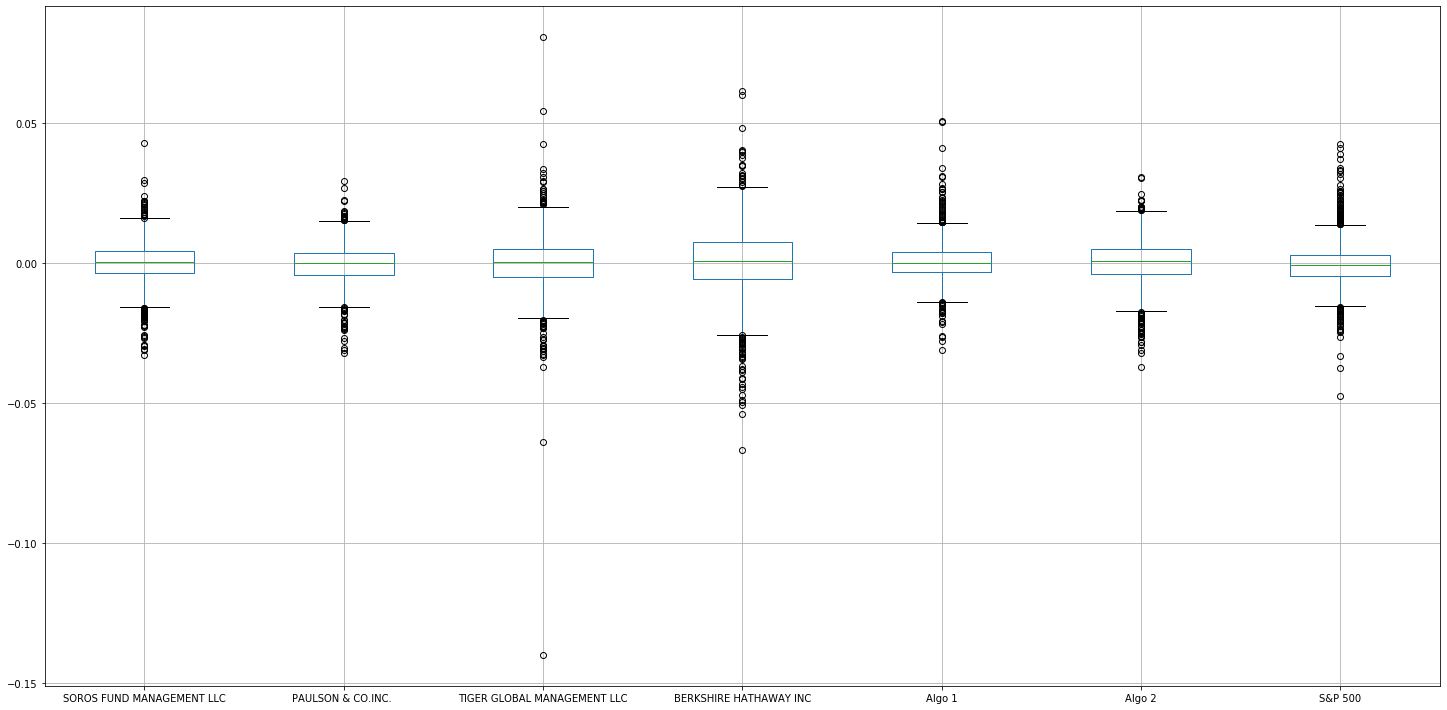

In [47]:
# Box plot to visually show risk
# YOUR CODE HERE

combined_df.boxplot(figsize=(25,12.5))

# Analyses BOXPLOT

In [48]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

# calculate standard deviation by using std() function on combined portfolio

daily_standard_deviations = combined_df.std()

# sort values to determine respective risk levels

daily_standard_deviations.sort_values()


PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

As we can see in the above overview of standard deviations of the respective portfolios, the std of S&P500 = 0.008587. If we want to determine what portfolios are riskier than S&P500 we need to look for portfolios with a higher standard deviation. We can conclude that Tiger Global Management (std= 0.010897) and Berkshire Hathaway (std= 0.012919) are riskier than the S&P500



In [49]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

# Annualized Standard Deviation of combined df is squareroot of annualuzed variance of combined df

annualized_standard_deviation = combined_df.std()*np.sqrt(252)
annualized_standard_deviation.sort_values(inplace=True)
annualized_standard_deviation


PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

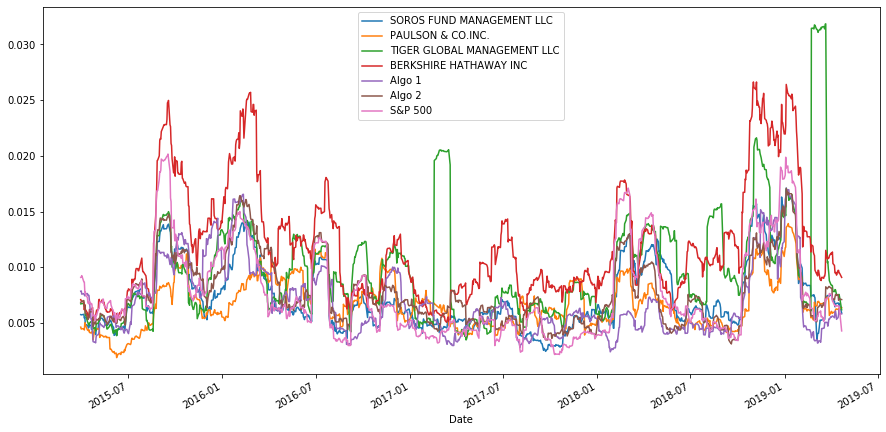

In [50]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_sma21 = combined_df.rolling(window=21).std()
combined_sma21.plot(figsize=(15, 7.5))

# risk increase levels for each of portfolios vis-a-vis risk increase for SP500 is not always the same. This probably has to do with different levels of correleation and BETAs. 

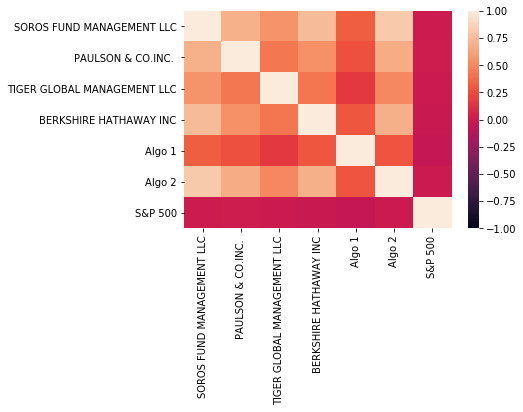

In [51]:
# Correlation
# YOUR CODE HERE
correlation_combined_df = combined_df.corr()
correlation_combined_df

# create correlation table to determine which returns most closely mimic the S&P500
sns.heatmap(correlation_combined_df,vmin=-1, vmax=1)


In [82]:
# Which returns most closely mimic the S&P 500

correlation_combined_df

# read table 

# Most closely correlating SP500 means correlation portofolio and SP500 need to be as close to 1 as possible (1=perfect correlation)

## As we can see Paulsen Co Inc most closely mimics SP500

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
S&P 500                                       0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
S&P 500                                        -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
S&P 500                                   -0.013856 -0.033963 -0.002192   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
S&P 500                      1.000000

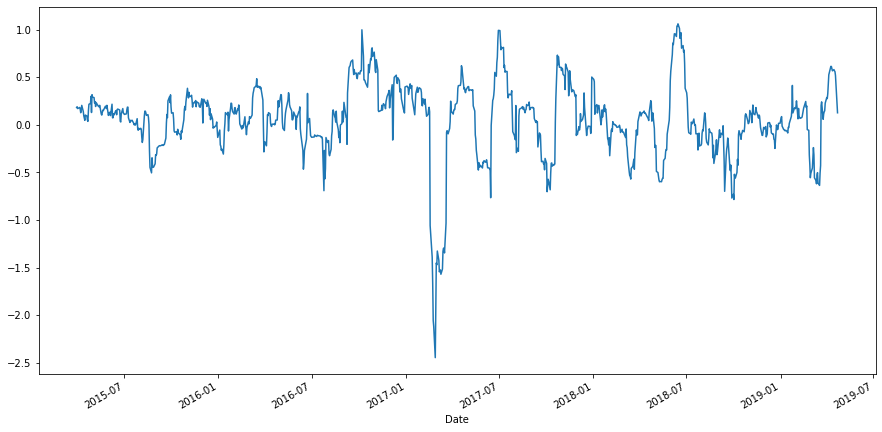

In [53]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

# In order to calculate a rolling Beta we need rolling covariance and rolling variance - I will pick Tiger Global Management LLC in this example for 21 days

## Tiger Global and SP500 covariance 21-day rolling

rolling_tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_df['S&P 500'])

## Rolling 21 day variance of SP500 

rolling_variance_sp500 = combined_df['S&P 500'].rolling(window=21).var()

## 21 day rolling Beta of Tiger Global

rolling_tiger_beta = rolling_tiger_covariance / rolling_variance_sp500
rolling_tiger_beta.plot(figsize=(15, 7.5))


## Does the portfolio seem sensitive to movements in the S&P 500?

As you can see in the above rolling Beta plot the Beta for Tiger fluctuates between 1 and -2.5 which means that movements in the SP500 do impact this portfolio, but in different ways and levels over time. In this time frame we have seen both positive and negative betas referring to strong correlation/volatility (if higher than 1) and inverse correlation where betas are <0.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

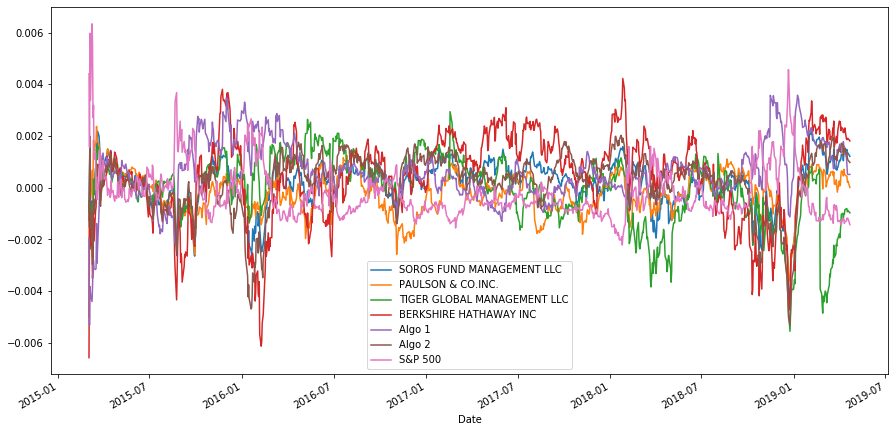

In [54]:
# (OPTIONAL) YOUR CODE HERE

# Use the pandas ewm function with halflife 21 and plot the ewm of mean of combined df

ewm21_combined_df = combined_df.ewm(halflife=21).mean().plot(figsize=(15, 7.5))



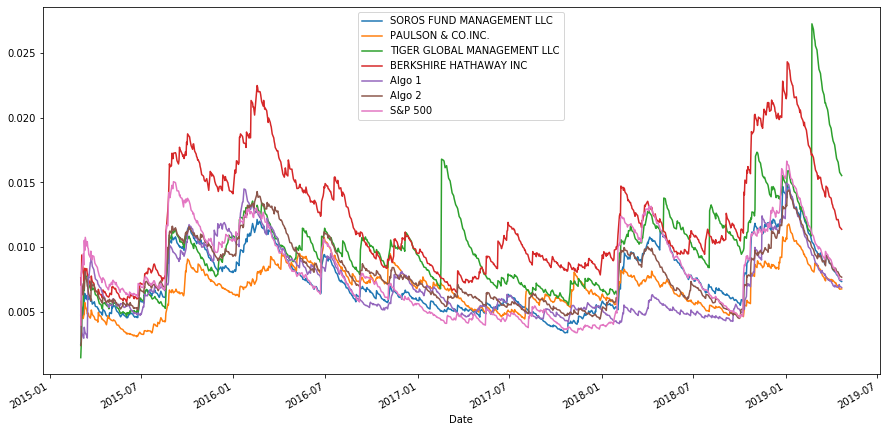

In [55]:
# Use the pandas ewm function with halflife 21 and plot the ewm of std of combined df

ewm21_combined_df = combined_df.ewm(halflife=21).std().plot(figsize=(15, 7.5))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [56]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

# calculate sharpe ratio combined, risk free rate ~0

sharpe_ratios_combined = combined_df.mean()/ combined_df.std()

sharpe_ratios_combined

# annualize the sharpe ratios combined by multiplying the sharpe ratios by the sqrt of 252 (trading days)

annualized_sharpe_ratios_combined = sharpe_ratios_combined*np.sqrt(252)
annualized_sharpe_ratios_combined

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

In [57]:
# option 2 to calculate the annualized sharpe ratios

annualized_sharpe_ratios_combined_1 = combined_df.mean()* 252/ (combined_df.std() * np.sqrt(252))
annualized_sharpe_ratios_combined_1

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

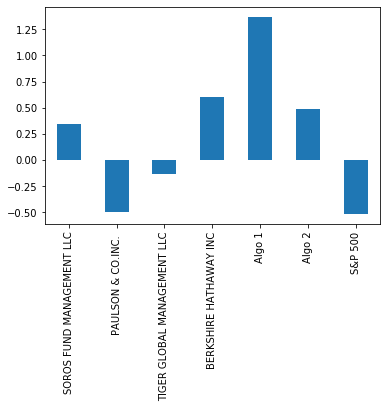

In [58]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

annualized_sharpe_ratios_combined.plot(kind='bar')


# On the basis of this performance metric, do our algo strategies outperform both 'the market' SP500 and the whales?

In order to determine if based on this performance metric (Sharpe ratio) our algo-strategies pay off, we need to compare their respective annualized sharpe ratios with the annualized sharpe ratios of the whales and S&P 500. A higher Sharpe ratio would mean a higher return earned (in axcess of RFR) per extra unit of volatility. In other words, we want our Sharpe ratios to be as high as possible. 

As we can see only Algo 1 significantly outperforms the whales and SP500 on this metric. Algo 2 does outperform the SP500 but not all of the whales - Berkshire Hathaway has a better sharpe ratio performance. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [59]:
# Read the first stock (AMZN)
# YOUR CODE HERE

# Reading AMZN
amzn_csv = Path("Resources/Portfolio/AMZN.csv")

# Read in and create dataframe AMZN
amzn_df = pd.read_csv(amzn_csv, infer_datetime_format=True, parse_dates=True)

# remove the closing times from the data 
amzn_df["Date"] = pd.to_datetime(amzn_df['Date']).dt.normalize()

# set date as index 

amzn_df.set_index(pd.to_datetime(amzn_df['Date'], infer_datetime_format=True), inplace=True)

# remove extra date column

amzn_df.drop(columns=["Date"], inplace=True)
amzn_df.head()

Close
Date              
2015-01-02  308.52
2015-01-05  302.19
2015-01-06  295.29
2015-01-07  298.42
2015-01-08  300.46

In [60]:
# Read the second stock (BMY)
# YOUR CODE HERE

# Reading AMZN
bmy_csv = Path("Resources/Portfolio/BMY.csv")

# Read in and create dataframe AMZN
bmy_df = pd.read_csv(bmy_csv, infer_datetime_format=True, parse_dates=True)

# remove the closing times from the data 
bmy_df["Date"] = pd.to_datetime(bmy_df['Date']).dt.normalize()

# set date as index 

bmy_df.set_index(pd.to_datetime(bmy_df['Date'], infer_datetime_format=True), inplace=True)

# remove extra date column

bmy_df.drop(columns=["Date"], inplace=True)
bmy_df.head()



Close
Date             
2015-01-02  59.51
2015-01-05  58.58
2015-01-06  58.48
2015-01-07  59.24
2015-01-08  60.72

In [61]:
# Read the third stock (LMT)
# YOUR CODE HERE

# Reading AMZN
lmt_csv = Path("Resources/Portfolio/LMT.csv")

# Read in and create dataframe AMZN
lmt_df = pd.read_csv(lmt_csv, infer_datetime_format=True, parse_dates=True)

# remove the closing times from the data 
lmt_df["Date"] = pd.to_datetime(lmt_df['Date']).dt.normalize()

# set date as index 

lmt_df.set_index(pd.to_datetime(lmt_df['Date'], infer_datetime_format=True), inplace=True)

# remove extra date column

lmt_df.drop(columns=["Date"], inplace=True)
lmt_df.head()

Close
Date              
2015-01-02  193.31
2015-01-05  189.29
2015-01-06  188.40
2015-01-07  190.83
2015-01-08  195.13

In [62]:
# Read the fourth stock (TIF)
# YOUR CODE HERE

# Reading AMZN
tif_csv = Path("Resources/Portfolio/TIF.csv")

# Read in and create dataframe AMZN
tif_df = pd.read_csv(tif_csv, infer_datetime_format=True, parse_dates=True)

# remove the closing times from the data 
tif_df["Date"] = pd.to_datetime(tif_df['Date']).dt.normalize()

# set date as index 

tif_df.set_index(pd.to_datetime(tif_df['Date'], infer_datetime_format=True), inplace=True)

# remove extra date column

tif_df.drop(columns=["Date"], inplace=True)
tif_df.head()

Close
Date              
2015-01-02  105.50
2015-01-05  103.75
2015-01-06  102.17
2015-01-07  105.18
2015-01-08  105.14

In [63]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

portfolio_df = pd.concat([amzn_df, bmy_df, lmt_df, tif_df], axis="columns", join="inner")
portfolio_df.sort_index(inplace=True)
portfolio_df.head()


Close  Close   Close   Close
Date                                     
2015-01-02  308.52  59.51  193.31  105.50
2015-01-05  302.19  58.58  189.29  103.75
2015-01-06  295.29  58.48  188.40  102.17
2015-01-07  298.42  59.24  190.83  105.18
2015-01-08  300.46  60.72  195.13  105.14

In [64]:
# Rename column names to reflect stocks

columns = ["AMZN", "BMY", "LMT", "TIF"]
portfolio_df.columns = columns
portfolio_df.head()


AMZN    BMY     LMT     TIF
Date                                     
2015-01-02  308.52  59.51  193.31  105.50
2015-01-05  302.19  58.58  189.29  103.75
2015-01-06  295.29  58.48  188.40  102.17
2015-01-07  298.42  59.24  190.83  105.18
2015-01-08  300.46  60.72  195.13  105.14

In [65]:
# Reset the index
# YOUR CODE HERE

portfolio_df.reset_index()

Date     AMZN    BMY     LMT     TIF
0    2015-01-02   308.52  59.51  193.31  105.50
1    2015-01-05   302.19  58.58  189.29  103.75
2    2015-01-06   295.29  58.48  188.40  102.17
3    2015-01-07   298.42  59.24  190.83  105.18
4    2015-01-08   300.46  60.72  195.13  105.14
...         ...      ...    ...     ...     ...
1000 2018-12-21  1377.45  49.82  256.55   75.78
1001 2018-12-24  1343.96  48.76  245.22   74.21
1002 2018-12-26  1470.90  50.03  251.62   77.80
1003 2018-12-27  1461.64  50.41  259.79   78.90
1004 2018-12-28  1478.02  50.94  261.26   79.12

[1005 rows x 5 columns]

In [66]:
# Drop Nulls
# YOUR CODE HERE

# Checking for null
portfolio_df.isnull()

# Determining percentage of nulls
portfolio_df.isnull().mean() * 100


# Drop nulls 
portfolio_df.dropna(inplace=True)

# Check if nulls are gone
portfolio_df.isnull().sum()

portfolio_df.head()


AMZN    BMY     LMT     TIF
Date                                     
2015-01-02  308.52  59.51  193.31  105.50
2015-01-05  302.19  58.58  189.29  103.75
2015-01-06  295.29  58.48  188.40  102.17
2015-01-07  298.42  59.24  190.83  105.18
2015-01-08  300.46  60.72  195.13  105.14

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [67]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
# YOUR CODE HERE

# calculate unweighted daily returns or portfolio_df

daily_returns_portfolio = portfolio_df.pct_change()
daily_returns_portfolio

# weighted daily returns

portfolio_returns_weighted = daily_returns_portfolio.dot(weights)
portfolio_returns_weighted.head()


Date
2015-01-02         NaN
2015-01-05   -0.018382
2015-01-06   -0.011118
2015-01-07    0.016489
2015-01-08    0.013493
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# YOUR CODE HERE

combined_portfolio_df = pd.concat([portfolio_returns_weighted, combined_df], axis='columns', join='inner')
combined_portfolio_df

0  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2015-03-03 -0.010591                  -0.001266           -0.004981   
2015-03-04  0.006668                   0.002230            0.003241   
2015-03-05  0.005495                   0.004016            0.004076   
2015-03-06 -0.015520                  -0.007905           -0.003574   
2015-03-09  0.004154                   0.000582            0.004225   
...              ...                        ...                 ...   
2018-12-21 -0.031255                  -0.022720           -0.020980   
2018-12-24 -0.027618                  -0.019152           -0.011786   
2018-12-26  0.048743                   0.042977            0.029338   
2018-12-27  0.011977                   0.004184           -0.007472   
2018-12-28  0.007542                   0.001145            0.000863   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2018-12-21                    -0.022570               -0.028892 -0.017888   
2018-12-24                    -0.029165               -0.020181 -0.003938   
2018-12-26                     0.030958                0.059909  0.022750   
2018-12-27                     0.009149                0.004813  0.001571   
2018-12-28                    -0.004019               -0.006178  0.014664   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254  
...              ...       ...  
2018-12-21 -0.021636  0.027868  
2018-12-24 -0.014745 -0.047250  
2018-12-26  0.030822 -0.008490  
2018-12-27  0.000494  0.001243  
2018-12-28  0.011664 -0.008421  

[965 rows x 8 columns]

In [73]:
# Clean combined portfolio

combined_portfolio_df.rename(columns= {0: "My Portfolio"}, inplace=True)
combined_portfolio_df

My Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2015-03-03     -0.010591                  -0.001266           -0.004981   
2015-03-04      0.006668                   0.002230            0.003241   
2015-03-05      0.005495                   0.004016            0.004076   
2015-03-06     -0.015520                  -0.007905           -0.003574   
2015-03-09      0.004154                   0.000582            0.004225   
...                  ...                        ...                 ...   
2018-12-21     -0.031255                  -0.022720           -0.020980   
2018-12-24     -0.027618                  -0.019152           -0.011786   
2018-12-26      0.048743                   0.042977            0.029338   
2018-12-27      0.011977                   0.004184           -0.007472   
2018-12-28      0.007542                   0.001145            0.000863   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2018-12-21                    -0.022570               -0.028892 -0.017888   
2018-12-24                    -0.029165               -0.020181 -0.003938   
2018-12-26                     0.030958                0.059909  0.022750   
2018-12-27                     0.009149                0.004813  0.001571   
2018-12-28                    -0.004019               -0.006178  0.014664   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254  
...              ...       ...  
2018-12-21 -0.021636  0.027868  
2018-12-24 -0.014745 -0.047250  
2018-12-26  0.030822 -0.008490  
2018-12-27  0.000494  0.001243  
2018-12-28  0.011664 -0.008421  

[965 rows x 8 columns]

In [76]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

combined_portfolio_df.dropna(inplace=True)
combined_portfolio_df.sort_index()
combined_portfolio_df.head()



My Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2015-03-03     -0.010591                  -0.001266           -0.004981   
2015-03-04      0.006668                   0.002230            0.003241   
2015-03-05      0.005495                   0.004016            0.004076   
2015-03-06     -0.015520                  -0.007905           -0.003574   
2015-03-09      0.004154                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

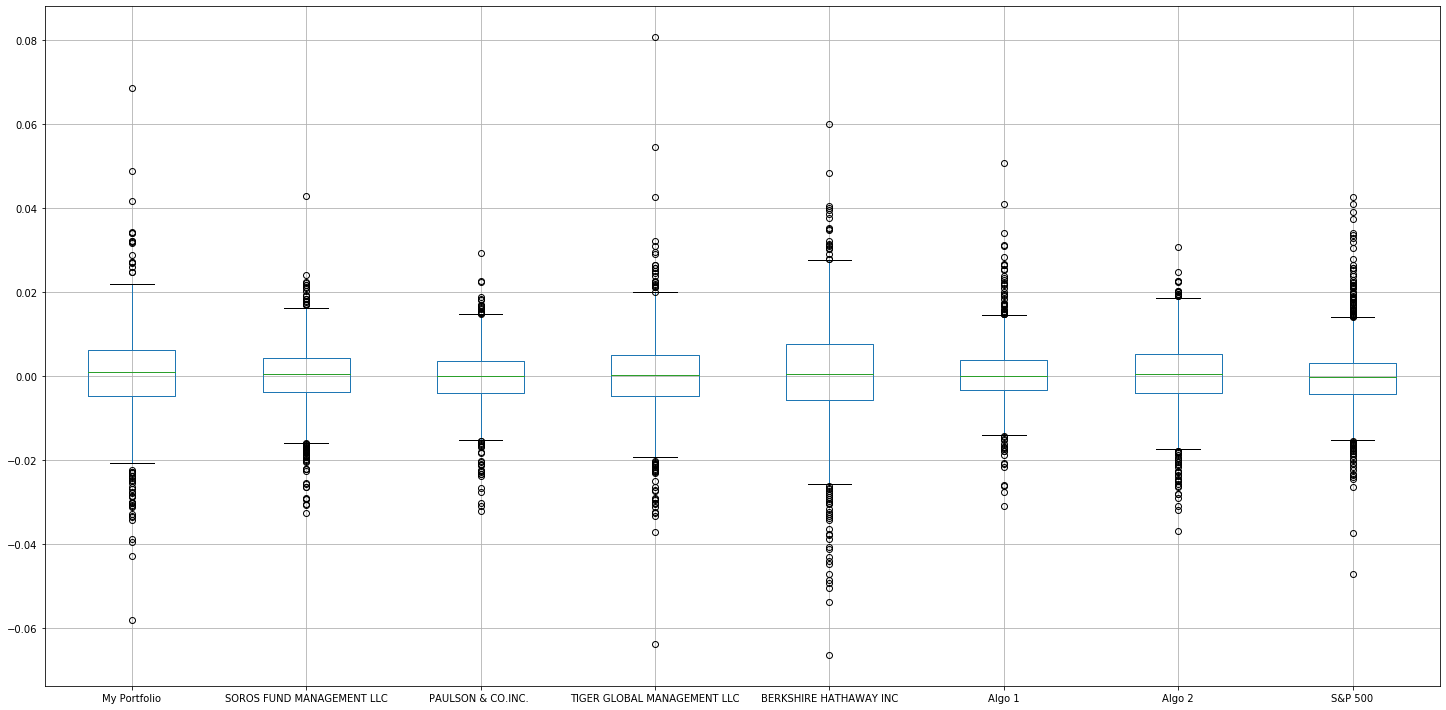

In [80]:
# Risk

# Box plot to visually show risk
# YOUR CODE HERE

combined_portfolio_df.boxplot(figsize=(25,12.5))

In [77]:
# Risk
# YOUR CODE HERE

# Annualized Standard Deviation of combined df is squareroot of annualuzed variance of combined df

annualized_standard_deviation_combined = combined_portfolio_df.std()*np.sqrt(252)
annualized_standard_deviation_combined.sort_values(inplace=True)
annualized_standard_deviation_combined


PAULSON & CO.INC.              0.111258
Algo 1                         0.120451
SOROS FUND MANAGEMENT LLC      0.125546
Algo 2                         0.132716
S&P 500                        0.137086
TIGER GLOBAL MANAGEMENT LLC    0.160514
My Portfolio                   0.169250
BERKSHIRE HATHAWAY INC         0.204937
dtype: float64

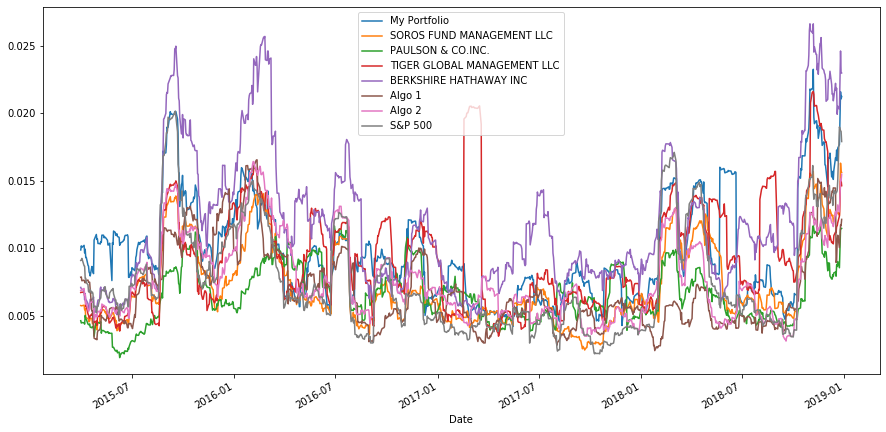

In [79]:
# Rolling
# YOUR CODE HERE

combined_portfolio_df.rolling(window=21).std().plot(figsize=(15, 7.5))



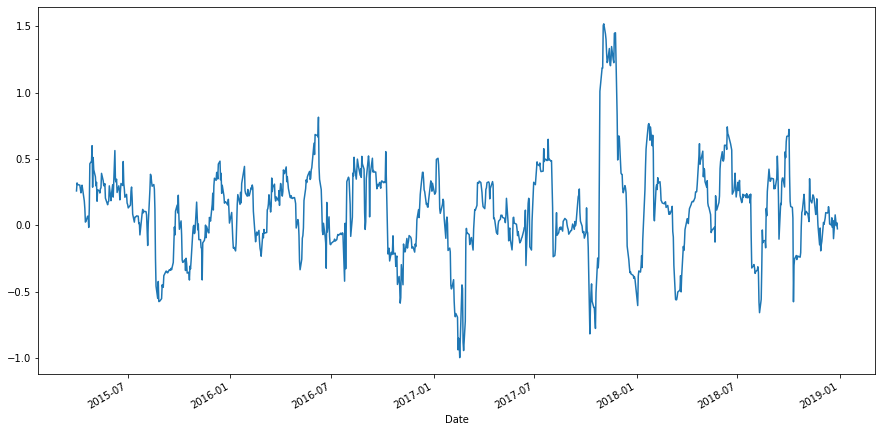

In [83]:
# Beta
# YOUR CODE HERE

# In order to calculate a rolling Beta we need rolling covariance and rolling variance  days

## My portfolio and SP500 covariance 21-day rolling

my_portfolio_covariance = combined_portfolio_df['My Portfolio'].rolling(window=21).cov(combined_portfolio_df['S&P 500'])

## Rolling 21 day variance of SP500 

rolling_variance_sp500 = combined_portfolio_df['S&P 500'].rolling(window=21).var()

## 21 day rolling Beta of My Portfolio

my_portfolio_beta = my_portfolio_covariance / rolling_variance_sp500
my_portfolio_beta.plot(figsize=(15, 7.5))




In [84]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

annualized_sharpe_ratios_combined_portfolio = combined_portfolio_df.mean()* 252/ (combined_portfolio_df.std() * np.sqrt(252))
annualized_sharpe_ratios_combined_portfolio


My Portfolio                   0.686531
SOROS FUND MANAGEMENT LLC     -0.014556
PAULSON & CO.INC.             -0.758167
TIGER GLOBAL MANAGEMENT LLC   -0.092509
BERKSHIRE HATHAWAY INC         0.318539
Algo 1                         1.165177
Algo 2                         0.129599
S&P 500                       -0.262004
dtype: float64

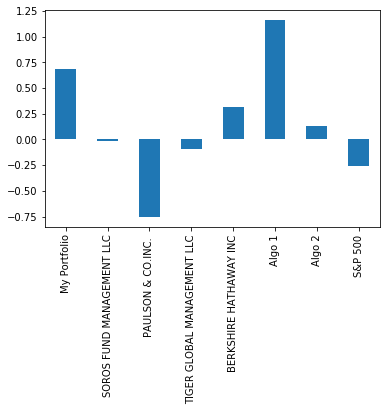

In [85]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

annualized_sharpe_ratios_combined_portfolio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE

In [87]:
correlation_combined_portfolio = combined_portfolio_df.corr()
correlation_combined_portfolio

My Portfolio  SOROS FUND MANAGEMENT LLC  \
My Portfolio                     1.000000                   0.664908   
SOROS FUND MANAGEMENT LLC        0.664908                   1.000000   
PAULSON & CO.INC.                0.558780                   0.695377   
TIGER GLOBAL MANAGEMENT LLC      0.499358                   0.605710   
BERKSHIRE HATHAWAY INC           0.651786                   0.754387   
Algo 1                           0.267748                   0.335219   
Algo 2                           0.673719                   0.827614   
S&P 500                         -0.000307                  -0.004018   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
My Portfolio                           0.558780                     0.499358   
SOROS FUND MANAGEMENT LLC              0.695377                     0.605710   
PAULSON & CO.INC.                      1.000000                     0.468603   
TIGER GLOBAL MANAGEMENT LLC            0.468603                     1.000000   
BERKSHIRE HATHAWAY INC                 0.540106                     0.476618   
Algo 1                                 0.266639                     0.185087   
Algo 2                                 0.671255                     0.563465   
S&P 500                                0.011781                    -0.006535   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
My Portfolio                               0.651786  0.267748  0.673719   
SOROS FUND MANAGEMENT LLC                  0.754387  0.335219  0.827614   
PAULSON & CO.INC.                          0.540106  0.266639  0.671255   
TIGER GLOBAL MANAGEMENT LLC                0.476618  0.185087  0.563465   
BERKSHIRE HATHAWAY INC                     1.000000  0.306460  0.682012   
Algo 1                                     0.306460  1.000000  0.288940   
Algo 2                                     0.682012  0.288940  1.000000   
S&P 500                                   -0.020357 -0.040650 -0.007112   

                              S&P 500  
My Portfolio                -0.000307  
SOROS FUND MANAGEMENT LLC   -0.004018  
PAULSON & CO.INC.            0.011781  
TIGER GLOBAL MANAGEMENT LLC -0.006535  
BERKSHIRE HATHAWAY INC      -0.020357  
Algo 1                      -0.040650  
Algo 2                      -0.007112  
S&P 500                      1.000000

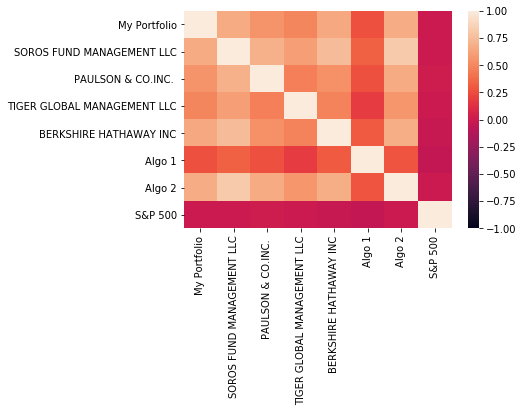

In [88]:
# create heatmap

sns.heatmap(correlation_combined_portfolio, vmin=-1, vmax=1)
